# Decision trees

1) A Decision tree is a flowchart-like tree structure, where 

a) each internal node denotes a test on an attribute;

b) each branch represents an outcome of the test, and ;

c) each leaf node (terminal node) holds a class label.

2) It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

3) It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.


Algorithm

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.

Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

Step-3: Divide the S into subsets that contains possible values for the best attributes.

Step-4: Generate the decision tree node, which contains the best attribute.

Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from mlxtend.plotting import plot_decision_regions
#from utils import plot_decision

In [1]:
# load the data
df = pd.read_csv('/content/sample_data/fish.csv')
df['spe'], _ = pd.factorize(df['Species'])
df.head()

NameError: ignored

In [ ]:
# select features
y = df['spe']
X = df[['Width','Length3']]
print(X)

      Width  Length3
0    4.0200     30.0
1    4.3056     31.2
2    4.6961     31.1
3    4.4555     33.5
4    5.1340     34.0
..      ...      ...
154  1.3936     13.4
155  1.2690     13.5
156  1.2558     13.8
157  2.0672     15.2
158  1.8792     16.2

[159 rows x 2 columns]


In [ ]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

## Train the model and make predictions

Note we didn't have to standardize the data to use a decision tree.

In [ ]:
# train the decision tree
#Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)
#-1/2 log(1/2) -1/2log(1/2)= -log(1/2)=-log(2^-1)=1log2=1

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

## Evaluate the model's performance

Including the tree's axis-parallel decision boundaries and how the tree splits

In [ ]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
count_correct= (y_test == y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 21
Accuracy: 0.56


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


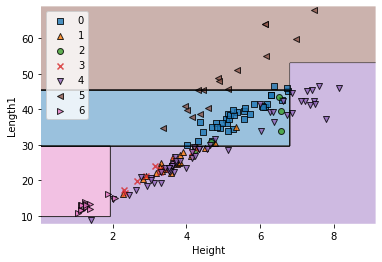

In [ ]:
#print(X_train[0:5])
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
#print(y_train)
#print(y_combined)
plot_decision_regions(X=X_combined, y=y_combined, clf=dtree)
plt.xlabel('Height')
plt.ylabel('Length1')
plt.legend(loc='upper left')
plt.show()

Now visualize how the tree splits using [GraphViz](http://www.graphviz.org/) (make sure you install it first):

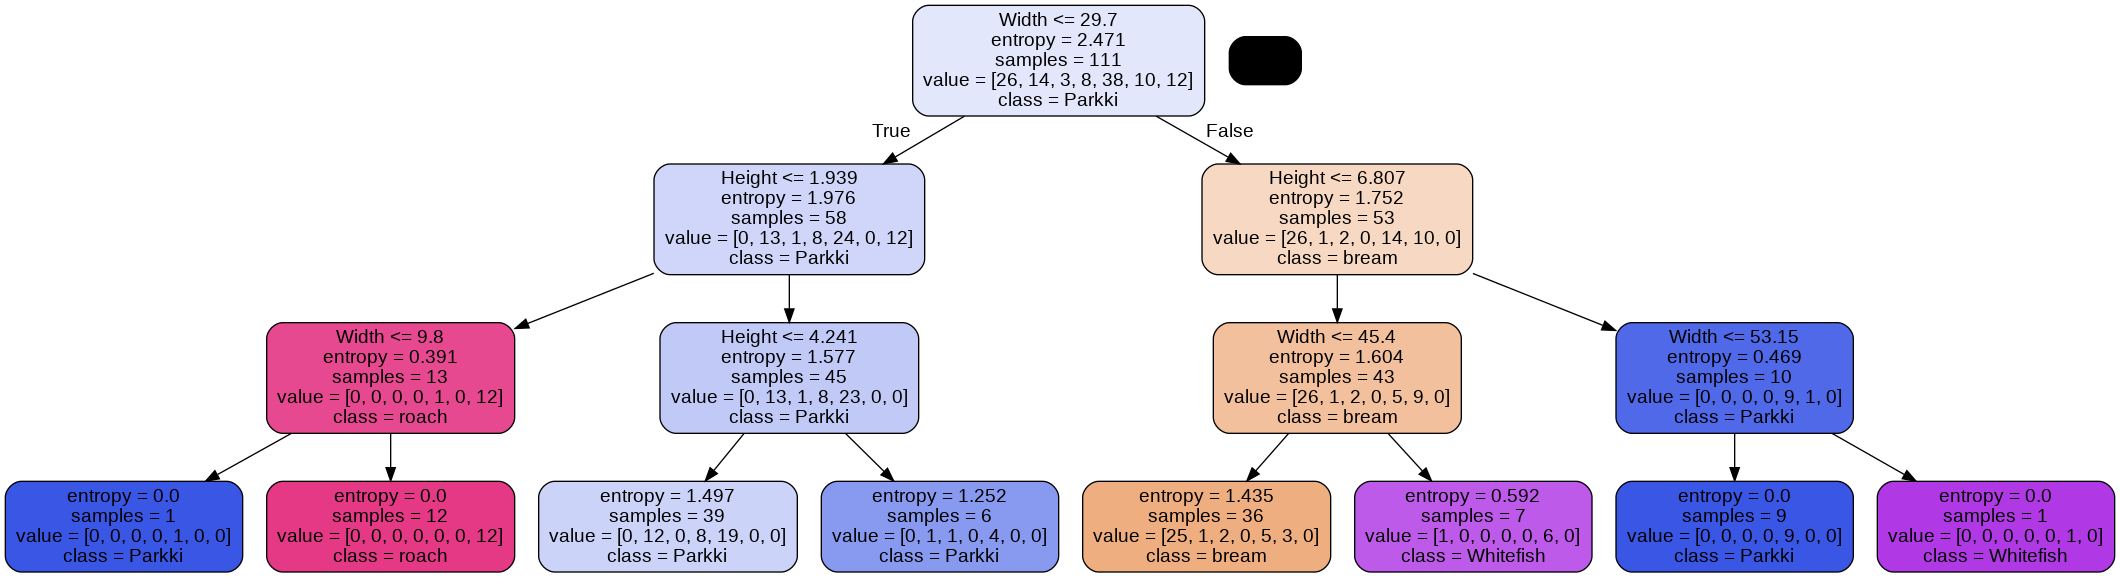

In [ ]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['Height','Width'],
                                class_names=['bream', 'Pike', 'Smelt','Perch','Parkki','Whitefish','roach'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))